### 必要なライブラリをインポートする

In [1]:
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit,QubitBra
from sympy.physics.quantum.qubit import measure_all, measure_all_oneshot
from sympy.physics.quantum.gate import X,Y,Z,H,S,T,CNOT,SWAP, CGateS
from sympy.physics.quantum.gate import IdentityGate as _I

↓SymPy で良い感じに表示するためのおまじない

In [2]:
# !pip install graphviz
from sympy.printing.dot import dotprint
from graphviz import Source
init_printing()

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sympy.physics.quantum.circuitplot import CircuitPlot,labeller, Mz,CreateOneQubitGate

## 重ね合わせ状態の中の、ある状態のみマーキングする

重ね合わせ状態の中の、ある状態 $ s_t $ のみに、−１掛ける操作（ここでは、マーキングを呼びます）を考えます。  
  
たとえば、２量子ビットの重ね合わせ状態 $\displaystyle \frac{1}{2} \left(\ |\ 00\ \rangle\ +\ |\ 01\ \rangle\ +\ |\ 10\ \rangle\ +\ |\ 11\ \rangle\ \right) $ を考えるとき、  
状態 $\;|\ 10\ \rangle\;$ をマーキングするとします。   
  
マーキング後の状態は、$\displaystyle  \frac{1}{2} \left(\ |\ 00\ \rangle\ +\ |\ 01\ \rangle\ -\ |\ 10\ \rangle\ +\ |\ 11\ \rangle\ \right) $ となることを目指します。

### ３量子ビットのマーキング操作を試してみましょう

In [4]:
def hadamard(s,n):
    h = H(s)
    for i in range(s+1,n+s):
       h = H(i)*h
    return h
def CCX(c1,c2,t):  return CGateS((c1,c2),X(t))

In [5]:
h_3 = hadamard(0,3)
target_state_3 = qapply(h_3*Qubit('000'))          #３量子ビットの重ね合わせ状態を準備します。
def CCZ(c1,c2,t): return (H(t)*CCX(c1,c2,t)*H(t)) # ＣＣＺ演算子を定義します。

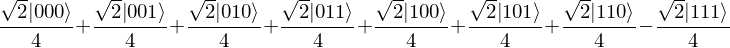

In [6]:
mark_7 = CCZ(1,2,0)
qapply(mark_7*target_state_3)

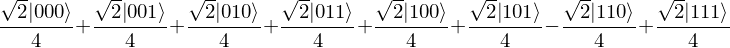

In [7]:
mark_6 = X(0)*CCZ(1,2,0)*X(0)
qapply(mark_6*target_state_3)

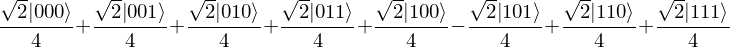

In [8]:
mark_5 = X(1)*CCZ(1,2,0)*X(1)
qapply(mark_5*target_state_3)

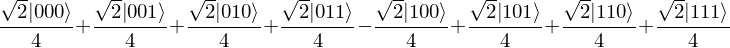

In [9]:
mark_4 = X(1)*X(0)*CCZ(1,2,0)*X(1)*X(0)
qapply(mark_4*target_state_3)

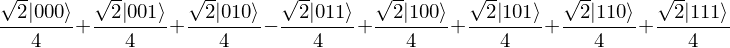

In [10]:
mark_3 = X(2)*CCZ(1,2,0)*X(2)
qapply(mark_3*target_state_3)

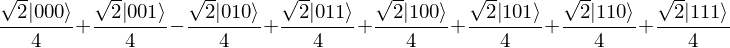

In [11]:
mark_2 = X(2)*X(0)*CCZ(1,2,0)*X(2)*X(0)
qapply(mark_2*target_state_3)

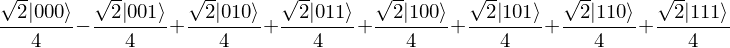

In [12]:
mark_1 = X(2)*X(1)*CCZ(1,2,0)*X(2)*X(1)
qapply(mark_1*target_state_3)

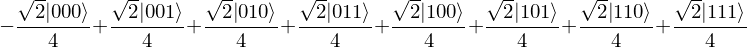

In [13]:
mark_0 = X(2)*X(1)*X(0)*CCZ(1,2,0)*X(2)*X(1)*X(0)
qapply(mark_0*h_3*Qubit('000'))

## 重ね合わせ状態の中に、マーキングした状態があるかを見る
  
著名な操作「Grover のアルゴリズム」を試してみましょう。  

（ヒント１）平均値周りの反転操作：$\displaystyle D_{n} = H_{n} \cdot \Big( 2\ |\ 0\ \rangle\langle\ 0\ |_{n}\ -\ I_{n} \Big) \cdot H_{n} $ を使います。  
  
（ヒント２）試行回数は、$\displaystyle \mathcal{O}(\sqrt{n}) $ 


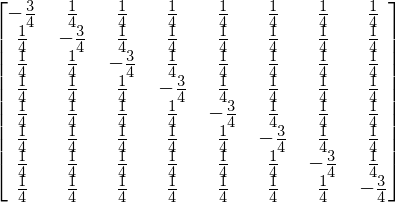

In [14]:
# d_3 = h_3 * X(0)*X(1)*X(2) * H(0)*CCX(1,2,0)*H(0) * X(0)*X(1)*X(2) * h_3    # グローバル位相（絶対位相）の差に注意
# d_3 = h_3 * X(0)*X(1)*X(2) * CGateS((1,2), Z(0)) * X(0)*X(1)*X(2) * h_3
def DOp(n): return (Qubit('0'*n)*QubitBra('0'*n)*2-_I(0))     # ゲート操作で計算するには、上記コメントのような演算になります。
d_3 = h_3 * DOp(3) * h_3    # 平均値周りの反転操作
represent(d_3,nqubits=3)

### ３量子ビットで状態｜７＞を探す

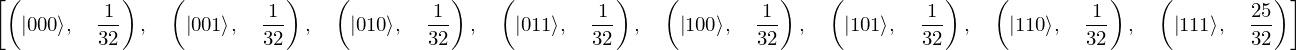

In [15]:
ret1=qapply(d_3*mark_7*target_state_3)
measure_all(ret1)

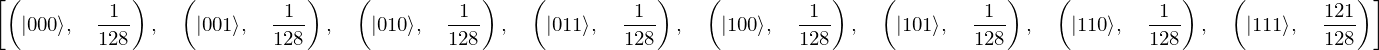

In [16]:
ret2=qapply(d_3*mark_7*ret1)  # シミュレーター計算ですから、上で一度観測した ret1 を使っても観測の影響なく次の計算に利用可能。
measure_all(ret2)

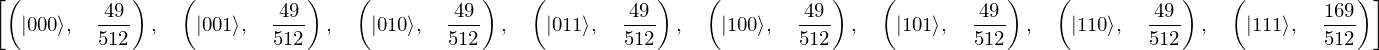

In [17]:
over_1=qapply(d_3*mark_7*ret2)  # 試行回数が多いとどうなるでしょう。
measure_all(over_1)

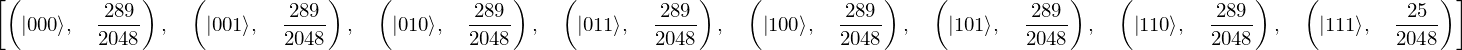

In [18]:
over_2=qapply(d_3*mark_7*over_1)  # 試行回数が多いとどうなるでしょう。
measure_all(over_2)

通しで計算すると、回路が長くなってきています。少し時間かかります。

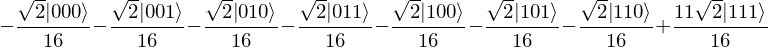

In [19]:
from sympy.physics.quantum.gate import gate_simp
search_7_in_3qubit = gate_simp(d_3*mark_7*d_3*mark_7)
ret3=qapply(search_7_in_3qubit*target_state_3)
ret3

In [20]:
print(measure_all(ret3))
for i in range(10):
    pprint(measure_all_oneshot(ret3))

[(|000>, 1/128), (|001>, 1/128), (|010>, 1/128), (|011>, 1/128), (|100>, 1/128), (|101>, 1/128), (|110>, 1/128), (|111>, 121/128)]
❘111⟩
❘111⟩
❘111⟩
❘111⟩
❘111⟩
❘111⟩
❘111⟩
❘111⟩
❘111⟩
❘111⟩


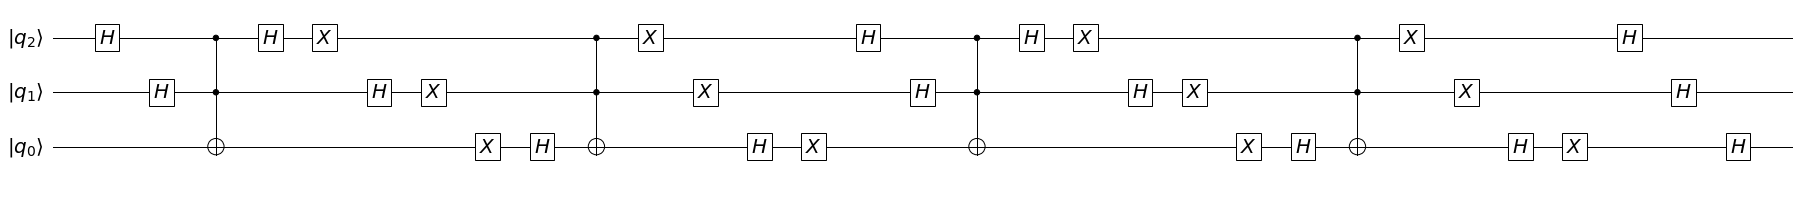

In [21]:
d_3_gate = h_3 * X(0)*X(1)*X(2) * H(0)*CCX(1,2,0)*H(0) * X(0)*X(1)*X(2) * h_3
CircuitPlot(gate_simp(d_3_gate*mark_7*d_3_gate*mark_7*h_3),nqubits=3,labels=labeller(3)[::-1])

## 【課題１】グローバーのアルゴリズム
<strong>
問１） 
    
１. 次の「問１の初期状態」 quest_state を入力として、この量子状態に $\lvert 111 \rangle $ が含まれるか  
　グローバーのアルゴリズムを使って調べてください。  

２. 上の条件で、この量子状態に $\lvert 101 \rangle $ が含まれるかをグローバーのアルゴリズムを  
　使って調べる考察をします。（うまくいかない例を見ます）  
　  
　・プログラムを作り、実際は、$\lvert 101 \rangle $ が高確率で検出されることを調べてください。  
　・なぜ、初期状態に含まれていない状態が検出されるか理由を考えましょう。（解答は口頭でよい）  
　  
　  
問２）  
１. 下の「問２の初期状態」quest2_state を入力として、問１と同様、  
　$\lvert 111 \rangle $ と $\lvert 101 \rangle $ の状態にの検知について  グローバーのアルゴリズムを適用して、  
　その状況を考察してください。
　  
　  
</strong>

**以降、【課題１】問１−１）の回答欄：**  

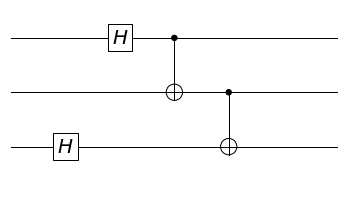

In [22]:
# 問１の初期状態
quest_state = CNOT(1,0)*CNOT(2,1)*H(2)*H(0)*Qubit('000')
CircuitPlot(quest_state,nqubits=3)

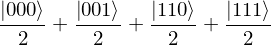

In [23]:
# 計算した初期状態を init_state とする
init_state = qapply(quest_state)
init_state

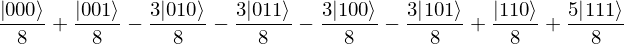

In [24]:
# | 111 > の検索する量子回路を作成する。

mark_7 = CCZ(1,2,0)
grover_7 = gate_simp(d_3*mark_7*d_3*mark_7)
state1_7 = qapply(d_3*mark_7*init_state)
qapply(d_3*mark_7*state1_7)

In [25]:
# 上で作った量子回路を初期状態と作用させて measure_all_oneshot() で何回か試行して、結果をみる。


for i in range(10):
    pprint(measure_all_oneshot(qapply(grover_7*init_state)))

❘011⟩
❘000⟩
❘111⟩
❘101⟩
❘011⟩
❘100⟩
❘010⟩
❘111⟩
❘111⟩
❘111⟩


**以降、【課題１】問１−２）の回答欄：**  

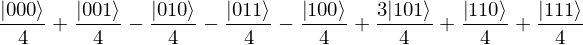

In [26]:
# | 101 > の検索する量子回路を作成する。

mark_5 = X(1)*CCZ(1,2,0)*X(1)
grover_5 = gate_simp(d_3*mark_5*d_3*mark_5)
state1_5 = qapply(d_3*mark_5*init_state)
qapply(d_3*mark_5*state1_5)

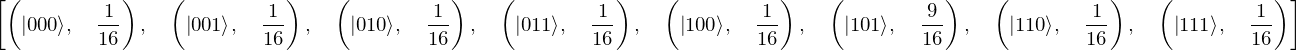

In [27]:
# 上で作った量子回路を初期状態と作用させて measure_all() でかく状態の確率をみて、考察する。

measure_all(qapply(grover_5*init_state))

**以降、【課題１】問２−１）の回答欄：**  

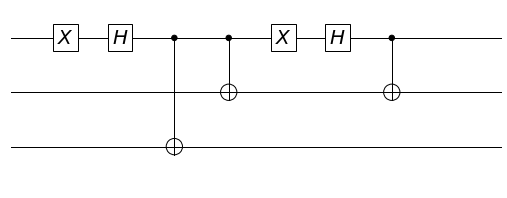

In [28]:
# 問２の初期状態
quest2_state = CNOT(2,1)*H(2)*X(2)*CNOT(2,1)*CNOT(2,0)*H(2)*X(2)*Qubit('000')
CircuitPlot(quest2_state,nqubits=3)

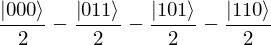

In [29]:
# 問２の回答欄（１）

init2_state = qapply(quest2_state)
init2_state

In [30]:
# 問２の回答欄（２）

for i in range(10):
    pprint(measure_all_oneshot(qapply(grover_7*init2_state)))

❘000⟩
❘101⟩
❘101⟩
❘011⟩
❘101⟩
❘000⟩
❘000⟩
❘101⟩
❘011⟩
❘111⟩


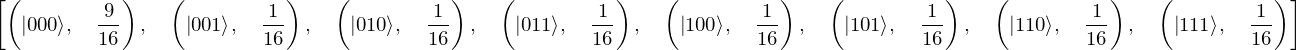

In [31]:
# 問２の回答欄（３）

measure_all(qapply(grover_5*init2_state))